# Evaluation Metrics
#### 2021-05-04

## **why metrics are important**

    - Metrics are important to evaluate models. To build better models by evaluating.
    - Metrics help capture business goals into quantitative target (not all errors are equal)
    - Metrics will help the teams effort into an definitive target/goal
    - Usefull to quantify the gap between,
        - Desired performance and baseline
        - Desired performance and current performance
        - Measure progress over time
    - Useful for lower level tasks and debugging (e.g. diagnosing bias vs variance).
    - Ideally training objective should be the metric, but not always possible. Still, metrics are useful and important for evaluation.

In this notebook we are going to discuss about classificatio and regression metrics. Learning these metrics help in mastering the evaluation metrics concepts

```
    1. Classification Metrics
    2. Regression  Metrics
```

## 1. Classification Metrics

* There are different types of evaluation metrics in machine learning/deep learning and which metric to use depends on the dataset and also problem statement. Knowing when to use which metric is also an important job of Data Scientist.

* We are going to see the following metrics in details, their mathematics etc.

```
1. Confusion Matrix
    a. Accuracy
    b. Precision
    c. Recall (Sensitivity)
    d. Specificity
    d. F1-Score
    
2. AUC-ROC

3. Log-Loss

```

### 1. Confusion Metric

* Confusion matrix is the most commonly used metrics in machine learning or deep learning . The easiest way of understanding it is through diagrams. 

* Before diving into diagrams, let us understand what it contains and how it represented. The confusion matrix mainly used for classification problems .i.e to identify predicted classes from actual classes.

* It mainly contain two outputs, one is actual outputs for all classes and the other is predicted outputs. Note that confusion matrix helps in measuring the correctness of our predicted classes from actual classes. 

* Let us take an example of predicted whether a person is having a cancer(1) or not (0). Note, here 1 means positive and 0 means negative

||Positive|Negative|
| :---:|:---: | :---: |
|Positive | TP | FP|
|Negative | FN| TN  |

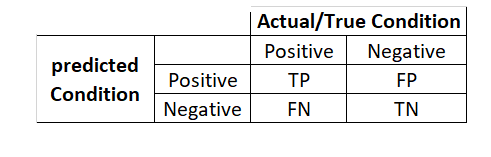

In [7]:
from IPython.display import Image
Image(filename="./my_icons/Evaluation_Metrics/Srikanth_Confusion_Matrix_Diag.png")

To understand more about confusion matrix, let us define what TP, FP etc. mean.

###### True Positives (TP):- 

* TP mean when the predicted class output and actual classes matches i.e. when the actual output is 1 and the predicted output is also 1

###### False Positives (FP):- 

* FP mean when the predicted class output and actual classes doesn't matches i.e. when the actual output is 0 and the predicted output is 1  (Type-1 Error)

###### Flase Negatives (FN):- 

* FN mean when the predicted class output and actual classes doesn't matches i.e. when the actual output is 1 and the predicted output is 0  (Type-2 Error)

###### True Negatives (TN):- 

* TN mean when the predicted class output and actual classes matches i.e. when the actual output is 0 and the predicted output is also 0

The ideal scenario should be that the model output 0 false positives and 0 false negatives. But that is not achievable in most of the real time scenarios.

#### a). Accuracy :-

* Accuracy is number of correct predictions given by the model divided by the total number of predictions.
Lets us see it in different way,

\begin{equation*} \frac{TP+TN}{TP+FP+TN+FN} \end{equation*}

* _When to use Accuracy_: 
        Accuracy is a good measure when the target variable classes in the data are nearly balanced.


#### b). Precision :-
* Precision is a measure that tells us what proportion of patients that we diagnosed as having cancer, actually had cancer. The predicted positives (People predicted as cancerous are TP and FP) and the people actually having a cancer are TP. Precision is defined as no. of true positives divided by the no of true positives plus no of false positivies.

\begin{equation*} \frac{TP}{TP+FP} \end{equation*}


#### c). Recall or Sensitivity :- 
* Recall is a measure that tells us what proportion of patients that actually had cancer was diagnosed by the algorithm as having cancer. The actual positives (People having cancer are TP and FN) and the people diagnosed by the model having a cancer are TP. (Note: FN is included because the Person actually had a cancer even though the model predicted otherwise.
* The ability of a model to find all the relevant cases within a dataset. Precise definition is number of true positivies divided by the number of true positivies plus the number of false negatives.

\begin{equation*} \frac{TP}{TP+FN} \end{equation*}

* _When to use Precision and When to use Recall?_:

* It is clear that recall gives us information about a classifier’s performance with respect to false negatives (how many did we miss), while precision gives us information about its performance with respect to false positives(how many did we caught).

* Precision is about being precise. So even if we managed to capture only one cancer case, and we captured it correctly, then we are 100% precise.

* Recall is not so much about capturing cases correctly but more about capturing all cases that have “cancer” with the answer as “cancer”. So if we simply always say every case as “cancer”, we have 100% recall.

* So basically if we want to focus more on minimising False Negatives, we would want our Recall to be as close to 100% as possible without precision being too bad and if we want to focus on minimising False positives, then our focus should be to make Precision as close to 100% as possible.

#### d). Specificity :-
* Specificity is a measure that tells us what proportion of patients that did NOT have cancer, were predicted by the model as non-cancerous. The actual negatives (People actually NOT having cancer are FP and TN) and the people diagnosed by us not having cancer are TN. (Note: FP is included because the Person did NOT actually have cancer even though the model predicted otherwise).

 \begin{equation*} \frac{TN}{TN+FP} \end{equation*}

* Specificity is the exact opposite of Recall

#### e). F1 - Score :-
* We don’t really want to carry both Precision and Recall in our pockets every time we make a model for solving a classification problem. So it’s best if we can get a single score that kind of represents both Precision(P) and Recall(R). F1 score is nothing but harmonic mean.

* Harmonic mean is kind of an average when x and y are equal. But when x and y are different, then it’s closer to the smaller number as compared to the larger number.

* While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.

* F1 Score = Harmonic Mean(Precision, Recall)

\begin{equation*} \frac{2*Precision*Recall}{Precision+Recall} \end{equation*}

* we use the harmonic mean instead of a simple average because it punishes extreme values. A classifier with precision of 1.0 and a recall of 0.0 has a simple average of 0.5 but an F1-score of 0

So, we have seen confusion matrix with different metrics like accuracy, precision, recall, F1-score, specificity etc.

### 2. AUC-ROC

 - The biggest advantage of using ROC curve is that it is independent of the change in proportion of responders. 
 - AUC-ROC curve helps us visualize how well our machine learning classifier is performing. Although it works for only  binary classification problems. 
  - (Area Under the Receiver operating characteristic)
 
 First lets discuss about the ROC

- Sensitivity : What proportion of positive class got correctly classified.
- Specificity : what proportion of the negative class got correctly classified

First lets try to understand ROC (Receiver operating characteristic) curve. If we look at the confusion matrix below, we observe that for a probabilistic model, we get different value for each metric.

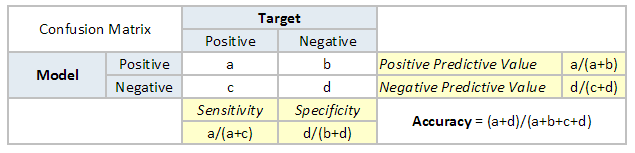

In [8]:
Image(filename="./my_icons/Evaluation_Metrics/Confusion_matrix.png")

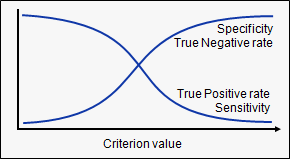

In [9]:
Image(filename="./my_icons/Evaluation_Metrics/sensitivity_specifitity_curves.png")

The ROC curve is the plot between sensitivity and (1- specificity). (1- specificity) is also known as false positive rate and sensitivity is also known as True Positive rate. Following is the ROC curve for the case in hand.

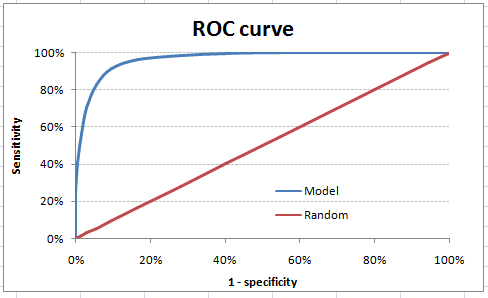

In [10]:
Image(filename="./my_icons/Evaluation_Metrics/ROC.png")

Let’s take an example of threshold = 0.5 (refer to confusion matrix). Here is the confusion matrix :

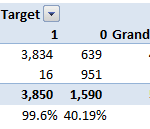

In [11]:
Image(filename="./my_icons/Evaluation_Metrics/Confusion_matrix2-150x129.png")

As you can see, the sensitivity at this threshold is 99.6% and the (1-specificity) is ~60%. This coordinate becomes one point in our ROC curve. To bring this curve down to a single number, we find the area under this curve (AUC).

Note that the area of entire square is 1*1 = 1. Hence AUC itself is the ratio under the curve and the total area. For the case in hand, we get AUC ROC as 96.4%. Following are a few thumb rules:

 - 90-1 = excellent (A)
 - 80-.90 = good (B)
 - 70-.80 = fair (C)
 - 60-.70 = poor (D)
 - 50-.60 = fail (F)
 
We see that we fall under the excellent band for the current model. But this might simply be over-fitting. In such cases it becomes very important to in-time and out-of-time validations.

#### Points to Remember:

1. For a model which gives class as output, will be represented as a single point in ROC plot.

2. Such models cannot be compared with each other as the judgement needs to be taken on a single metric and not using multiple metrics. For instance, model with parameters (0.2,0.8) and model with parameter (0.8,0.2) can be coming out of the same model, hence these metrics should not be directly compared.

3. In case of probabilistic model, we were fortunate enough to get a single number which was AUC-ROC. But still, we need to look at the entire curve to make conclusive decisions. It is also possible that one model performs better in some region and other performs better in other.

## **3. Log-Loss**

 - AUC ROC considers the predicted probabilities for determining our model’s performance. However, there is an issue with AUC ROC, it only takes into account the order of probabilities and hence it does not take into account the model’s capability to predict higher probability for samples more likely to be positive. In that case, we could us the log loss which is nothing but negative average of the log of corrected predicted probabilities for each instance.
 - Logarithmic Loss (Log Loss)
 - Rewards confident correct answers, heavily
 - penalizes confident wrong answers

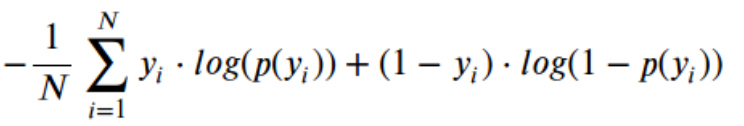

In [13]:
Image(filename="./my_icons/Evaluation_Metrics/log-loss.png")

 - p(yi) is predicted probability of positive class
 - 1-p(yi) is predicted probability of negative class
 - yi = 1 for positive class and 0 for negative class (actual values)

## 2. Regression Metrics

Regression is a task when a model attempts to predict continuous values.

```
    1. Mean Absolute Error (MAE)
    2. Mean Squared Error (MSE)
    3. Root Mean Squared Error (RMSE)
```

### 1. Mean Absolute Error (MAE)

* This is the mean of the absolute value or errors. 
$$ {\frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})} $$

* MAE wont punish large errors

### 2. Mean Squared Error (MSE)

* This is the mean of squared error. Large error are noted more than MAE, making MSE more popular
$$ {\frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2} $$

### 3. Root Mean Squared Error(RMSE) and Root Mean Squared Log Error (RMSLE)

RMSE and RMSLE  are used to find the difference between Actual output values(y) and predicted output values. 

To understand these concepts and their differences, it is important to know what does Mean Squared Error (MSE) mean. MSE incorporates both the variance and the bias of the predictor(target column). RMSE is the square root of MSE. In case of unbiased estimator, RMSE is just the square root of variance, which is actually Standard Deviation.

Note: Square root of variance is standard deviation.

Equations of RMSE:-

$$ \sqrt{\frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y_i})^2} $$

Equation of RMSLE:-

$$ \sqrt{\frac{1}{N}\sum_{i=1}^{N}(\log{(y_i)} - \log{\hat{(y_i}))}^2} $$



In case of RMSLE, you take the log of the predictions and actual values. So basically, what changes is the variance that you are measuring. I believe RMSLE is usually used when you don't want to penalize huge differences in the predicted and the actual values when both predicted and true values are huge numbers.

1. If both predicted and actual values are small: RMSE and RMSLE is same.
2. If either predicted or the actual value is big: RMSE > RMSLE
3. If both predicted and actual values are big: RMSE > RMSLE (RMSLE becomes almost negligible)

So, RMSLE measurement is not as widely used as MSE and MAE, but it is used as the metric for the Kaggle competition that uses the bike-sharing etc. dataset. It is, effectively, the RMSE of the log-transformed predicted and target values. This measurement is useful when there is a wide range in the target variable, and you do not necessarily want to penalize large errors when the predicted and target values are themselves high. It is also effective when you care about percentage errors rather than the absolute value of errors.

Lets have a look at the below example

Case a) : AV = 600,  PV = 1000

RMSE = 400, RMSLE = 0.5108

Case b) : AV = 1400, PV = 1000

RMSE = 400, RMSLE = 0.3365

Here, AV = Actual Value, PV = Predicted Value

References:-
1. https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b